In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import scipy.io
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import operator
from functools import reduce

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    

    plt.scatter(train_X[0, :], train_X[1, :], c=reduce(operator.add, train_Y), s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y

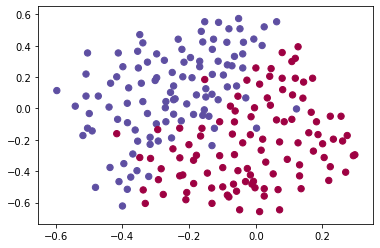

In [3]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [4]:
X, Y = train_X, train_Y

In [5]:
X.shape, Y.shape

((2, 211), (1, 211))

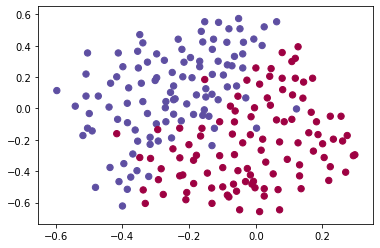

In [6]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=reduce(operator.add, Y), s=40, cmap=plt.cm.Spectral);

### Watching the performance of Logistic Regression for this Dataset

In [7]:
clf = sklearn.linear_model.LogisticRegressionCV() #declaring a classifier object
clf.fit(X.T, Y.T)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 92 % (percentage of correctly labelled datapoints)


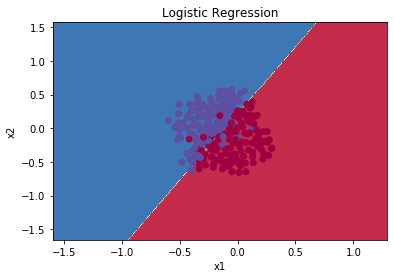

In [8]:
# plotting decision boundary

plot_decision_boundary(lambda x: clf.predict(x), X, reduce(operator.add, Y))
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [9]:
#defining various activation functions.

def reLU(z):
    return np.maximum(0, z)

In [10]:
z = [3,2,1,23]
reLU(z)

array([ 3,  2,  1, 23])

In [11]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [12]:
def gradientDescent(X, Y, parameters, learning_rate, num_iterations, print_cost = False): # Y is required to compute the cost
      
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"] 
    costs = [];
    m = X.shape[1]
    
    for i in range(num_iterations):
  
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        _loss = -( Y*np.log(A2) + (1-Y)* np.log(1-A2) )
        cost  = np.sum(_loss) / m

        cost = float(np.squeeze(cost))
        costs.append(cost)
        
        if(print_cost and i%1000 == 0):
            print("cost after iteration ",i,"= ", cost)
         
        
        dZ_2  = A2 - Y
        dW2  = np.dot(dZ_2, A1.T) / m
        db2  = np.sum(dZ_2, axis = 1, keepdims = True) / m
        g1primeOf_Z1 = 1 - np.power(A1,2)
        dZ_1  = np.multiply( np.dot(W2.T, dZ_2), g1primeOf_Z1) 
        db1  = np.sum(dZ_1, axis = 1, keepdims = True) / m
        dW1  = np.dot(dZ_1, X.T) / m
        
        W1 = W1 - learning_rate* dW1
        b1 = b1 - learning_rate* db1
        
        W2 = W2 - learning_rate* dW2
        b2 = b2 - learning_rate* db2
        
    
    parameters = { "W1":W1, "W2": W2, "b1":b1,"b2": b2 ,"dW1":dW1, "db1": db1, "dW2": dW2, "db2": db2 }
    return parameters

In [13]:
parameters = initialize_parameters(2, 4, 1)
parameters = gradientDescent(X, Y, parameters, 1.2, 10000, True)

cost after iteration  0 =  0.6931512825894527
cost after iteration  1000 =  0.22598004231681076
cost after iteration  2000 =  0.22279439005260965
cost after iteration  3000 =  0.2203571897767288
cost after iteration  4000 =  0.21384988219360082
cost after iteration  5000 =  0.2017902070733562
cost after iteration  6000 =  0.19566718104691283
cost after iteration  7000 =  0.19271891656242754
cost after iteration  8000 =  0.1905217720266847
cost after iteration  9000 =  0.18873874236966465


In [14]:
def predict(parameters, X):
    
    W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"] 
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    predictions = (A2 > 0.5)*1
    return predictions
    

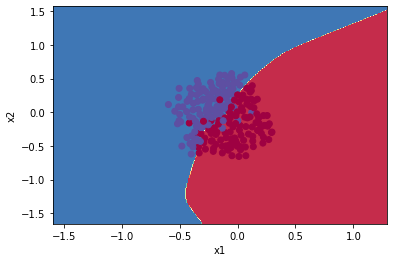

In [15]:
# GETTING RESULTS on the dataset FROM RANDOMLY INITIALISED PARAMeTERS.

predictions = predict( parameters, X)
plot_decision_boundary(lambda x: predict( parameters, x.T), X, reduce(operator.add, Y))

## Tune the sizes of our Hidden Layer. 

Accuracy for 5 hidden units: 94.7867298578199 %


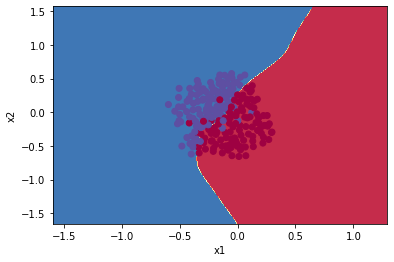

In [16]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50] # i have 6 sizes to try, choose from positions 0->5
size = hidden_layer_sizes[4]

parameters = initialize_parameters(2, size, 1)
parameters = gradientDescent(X, Y, parameters, 1.2, 10000)
plot_decision_boundary(lambda x: predict( parameters, x.T), X, reduce(operator.add, Y))

predictions = predict(parameters, X)
accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
print ("Accuracy for {} hidden units: {} %".format(size, accuracy))

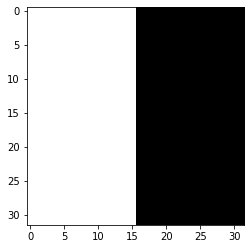

In [45]:
img = np.zeros((32,32))
for i in range(32):
    for j in range(16):
        img[i][j] = 1
        
    for j in range(16,32):
        img[i][j] = -1

plt.imshow(img, cmap = 'gray', vmin = -1, vmax = 1)

In [25]:
plt.imshow?

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """

    # Retrieve dimensions from A_prev's shapee 
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape[0], A_prev.shape[1], A_prev.shape[2], A_prev.shape[3]
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape[0], W.shape[1], W.shape[2], W.shape[3]
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = int((n_H_prev - f + 2*pad)/ stride + 1)
    n_W = int((n_H_prev - f + 2*pad)/ stride + 1)
    
    # Initialize the output volume Z with zeros
    Z = np.zeros((n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = np.pad(A_prev, ((0,0), (pad, pad), (pad, pad), (0,0)), mode = 'constant', constant_values = (0,0))

    # convolutions would be operated on this padded image in the following steps
    
    for i in range(m):               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]          # Select ith training example's padded activation
        for h in range(n_H):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = 
            vert_end = None
            
            for w in range(n_W):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice" 
                horiz_start = None
                horiz_end = None
                
                for c in range(n_C):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = a_prev[horiz_start: horiz_end, vert_start: vert_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron.
                    weights = W[f, f, n_C_prev, c] #getting cth filter from W 
                    biases = b[1, 1, 1, c] # bias for cth filter.
                    Z[i, h, w, c] = np.sum(a_slice_prev *weights) + np.float(biases)
                                               #this will be a 3D array, sum of all the elements of which will be taken
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache